# AASTHA DOSHI 

# TASK 1 :PREDICTION USING SUPERVISED MACHINE LEARNING 

# GRIP @ TSF

**Predict the percentage of an student based on the no. of study hours.**

**This is a simple linear regression task as it involves just 2 variables.**

**IMPORTING LIBRARY**

In [2]:
#Here we are importing all the necessary libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline


**READING DATASET FROM URL USING PANDAS**

In [5]:
#Using the data from given source
df=pd.read_csv("http://bit.ly/w-data")
print('Importing data')
df.head()

Importing data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Data is successfully imported**

**Now we will check for missing data(NaN) and if it exists then replace it by median value of the respective column**

In [9]:
#info() prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Since there are no missing or NaN values we can move forward with next steps.**

In [10]:
# describe() is used to view some basic statistical details like percentile, mean, std etc.
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**PLOTTING THE DISTRIBUTION OF SCORES**

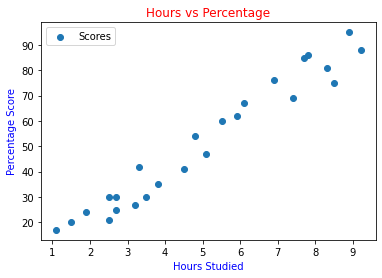

In [15]:
plt.scatter(df.Hours,df.Scores, label = 'Scores')

plt.title('Hours vs Percentage',color='red')
plt.xlabel('Hours Studied',color='blue')
plt.ylabel('Percentage Score',color='blue')

plt.legend()
plt.show()

**The above graph shows positive linear relation between the number of hours studied and the percentage of scores.**

**DATA PREPROCESSING**

This step involves division of data into "attributes" (inputs) and "labels" (outputs).

In [16]:
# iloc is used to assign the values of the variable in to X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [22]:
X.shape

(25, 1)

In [23]:
y.shape

(25,)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**PLOTTING TRAIN AND TEST DATA**

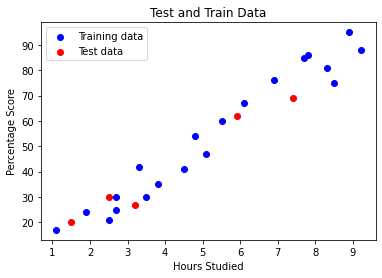

In [32]:
plt.scatter(X_train,y_train,color='blue',label="Training data")
plt.scatter(X_test,y_test,color="red",label="Test data")
plt.title('Test and Train Data')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

In [36]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("Training Complete")

Training Complete


We have trained our model using the training dataset.

In [37]:
print('Intercept:',reg.intercept_)

Intercept: 2.018160041434683


In [38]:
print('Coefficent:',reg.coef_)

Coefficent: [9.91065648]


**PLOTTING THE REGRESSION LINE**

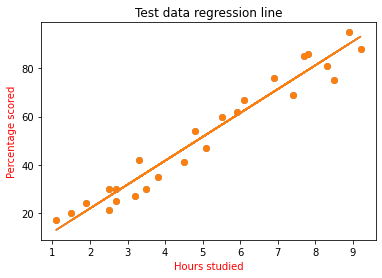

In [44]:
line = reg.coef_*X+reg.intercept_
# Plotting for the test data
plt.scatter(X, y,alpha=0.7)
plt.plot(X, line);
line = reg.coef_*X+reg.intercept_
# Plotting for the test data
plt.title('Test data regression line')
plt.xlabel('Hours studied',color="red")
plt.ylabel('Percentage scored',color="red")
plt.scatter(X, y)
plt.plot(X, line);
plt.show()


**PREDICTING THE TEST DATA**

In [45]:
y_prec=reg.predict(X_test)

**COMPARISON OF ACTUAL AND PREDICTED TEST DATA**

In [47]:
score=pd.DataFrame({'Actual':y_test,'Predicted':y_prec})
score

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [49]:
#Estimating training and test score
print("Training Score:",reg.score(X_train,y_train))
print("Test Score:",reg.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


**NOW WE WILL TEST USING OUR OWN DATA**

In [58]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
score_pred = reg.predict(test)
print("If the student studies {} hrs/day he would get {} percentage.".format(hours,score_pred[0]))

If the student studies 9.25 hrs/day he would get 93.69173248737538 percentage.


**ACCURACY OF OUR MODEL**

In [64]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_prec)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_prec))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_prec)))
accuracy=(metrics.r2_score(y_test, y_prec))*100


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [68]:
print('The model is {} % accurate'.format(round(accuracy,2)))

The model is 94.55 % accurate


# Conclusion:                                                                                                                    Thus I have predicted outcome using Supervised Learning Algorithm by using Linear Regression and  evaluated it's performance on various parameters.